In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import scipy
import random
from pathlib import Path

import matplotlib.pyplot as plt
from sklearn.cluster import k_means

random.seed(0)

In [2]:
import sys

sys.path.append("../src")

In [3]:
from core import SITE_NAMES
from calls import plot_call_features, compute_features

In [4]:
save_site = 'all_locations'

all_sites_call_signals = np.array([],dtype='object')
all_sites_call_info = pd.DataFrame()
for site_key in SITE_NAMES.keys():
    input_dir = Path(f'../data/detected_calls/{site_key}')
    input_file_type = 'top1_inbouts_call_signals'
    if (input_dir / f'2022_{site_key}_{input_file_type}.npy').exists():
        print(site_key)
        location_call_signals = np.load(input_dir / f'2022_{site_key}_{input_file_type}.npy', allow_pickle=True)
        print(location_call_signals.shape)
        location_calls_sampled = pd.read_csv(input_dir / f'2022_{site_key}_{input_file_type}.csv', index_col=0, low_memory=False)
        location_calls_sampled['index'] = location_calls_sampled.index

        all_sites_call_info = pd.concat([all_sites_call_info, location_calls_sampled])
        all_sites_call_signals=np.concatenate([all_sites_call_signals, location_call_signals])
        print(all_sites_call_signals.shape)


Central
(25676,)
(25676,)
Foliage
(56991,)
(82667,)
Carp
(42307,)
(124974,)
Telephone
(46565,)
(171539,)


In [5]:
all_sites_call_info = all_sites_call_info.reset_index(drop=True)
all_sites_call_info['index'] = all_sites_call_info.index
all_sites_call_info

index  bout_index   SD_card            file_name          site  \
0            0           0  UBNA_008  20220726_043000.WAV  Central Pond   
1            1           1  UBNA_008  20220726_043000.WAV  Central Pond   
2            2           2  UBNA_008  20220726_043000.WAV  Central Pond   
3            3           3  UBNA_008  20220726_043000.WAV  Central Pond   
4            4           3  UBNA_008  20220726_043000.WAV  Central Pond   
...        ...         ...       ...                  ...           ...   
171534  171534          45       NaN  20221017_133000.WAV           NaN   
171535  171535          46       NaN  20221017_133000.WAV           NaN   
171536  171536          47       NaN  20221017_133000.WAV           NaN   
171537  171537          48       NaN  20221017_133000.WAV           NaN   
171538  171538          49       NaN  20221017_133000.WAV           NaN   

              SNR  sampling_rate  start_time_wrt_ref  end_time_wrt_ref  \
0        8.895650         250000                 NaN               NaN   
1        8.256141         250000                 NaN               NaN   
2       35.272173         250000                 NaN               NaN   
3        9.727060         250000                 NaN               NaN   
4        9.746170         250000                 NaN               NaN   
...           ...            ...                 ...               ...   
171534  24.502263         192000            945.6925          945.6987   
171535   8.592850         192000            966.2425          966.2483   
171536   9.164494         192000            978.5655          978.5707   
171537  13.295326         192000            729.4345          729.4387   
171538   9.291877         192000           1200.4145         1200.4285   

        index_in_file  ...         event                      class  \
0                 NaN  ...           NaN                        NaN   
1                 NaN  ...           NaN                        NaN   
2                 NaN  ...           NaN                        NaN   
3                 NaN  ...           NaN                        NaN   
4                 NaN  ...           NaN                        NaN   
...               ...  ...           ...                        ...   
171534          608.0  ...  Echolocation  Pipistrellus pipistrellus   
171535          622.0  ...  Echolocation  Pipistrellus pipistrellus   
171536          631.0  ...  Echolocation  Pipistrellus pipistrellus   
171537          494.0  ...  Echolocation          Myotis mystacinus   
171538          636.0  ...  Echolocation          Nyctalus leisleri   

       class_prob det_prob  individual  \
0             NaN      NaN         NaN   
1             NaN      NaN         NaN   
2             NaN      NaN         NaN   
3             NaN      NaN         NaN   
4             NaN      NaN         NaN   
...           ...      ...         ...   
171534      0.532    0.627        -1.0   
171535      0.619    0.692        -1.0   
171536      0.633    0.650        -1.0   
171537      0.236    0.538        -1.0   
171538      0.437    0.624        -1.0   

                                               input_file        Site name  \
0                                                     NaN              NaN   
1                                                     NaN              NaN   
2                                                     NaN              NaN   
3                                                     NaN              NaN   
4                                                     NaN              NaN   
...                                                   ...              ...   
171534  /mnt/ubna_data_02_mir/recover-20221017/UBNA_00...  Telephone Field   
171535  /mnt/ubna_data_02_mir/recover-20221017/UBNA_00...  Telephone Field   
171536  /mnt/ubna_data_02_mir/recover-20221017/UBNA_00...  Telephone Field   
171537  /mnt/ubna_data_02_mir/recover-20221017/UBNA_00...  Telephone Field   
171

In [6]:
snr_thresh = 0
good_snr_location_calls_sampled = all_sites_call_info.loc[all_sites_call_info['SNR']>=snr_thresh].copy()
good_snr_location_calls_sampled.set_index(keys=np.arange(len(good_snr_location_calls_sampled)), inplace=True)
good_snr_location_calls_sampled

index  bout_index   SD_card            file_name          site  \
0            0           0  UBNA_008  20220726_043000.WAV  Central Pond   
1            1           1  UBNA_008  20220726_043000.WAV  Central Pond   
2            2           2  UBNA_008  20220726_043000.WAV  Central Pond   
3            3           3  UBNA_008  20220726_043000.WAV  Central Pond   
4            4           3  UBNA_008  20220726_043000.WAV  Central Pond   
...        ...         ...       ...                  ...           ...   
171534  171534          45       NaN  20221017_133000.WAV           NaN   
171535  171535          46       NaN  20221017_133000.WAV           NaN   
171536  171536          47       NaN  20221017_133000.WAV           NaN   
171537  171537          48       NaN  20221017_133000.WAV           NaN   
171538  171538          49       NaN  20221017_133000.WAV           NaN   

              SNR  sampling_rate  start_time_wrt_ref  end_time_wrt_ref  \
0        8.895650         250000                 NaN               NaN   
1        8.256141         250000                 NaN               NaN   
2       35.272173         250000                 NaN               NaN   
3        9.727060         250000                 NaN               NaN   
4        9.746170         250000                 NaN               NaN   
...           ...            ...                 ...               ...   
171534  24.502263         192000            945.6925          945.6987   
171535   8.592850         192000            966.2425          966.2483   
171536   9.164494         192000            978.5655          978.5707   
171537  13.295326         192000            729.4345          729.4387   
171538   9.291877         192000           1200.4145         1200.4285   

        index_in_file  ...         event                      class  \
0                 NaN  ...           NaN                        NaN   
1                 NaN  ...           NaN                        NaN   
2                 NaN  ...           NaN                        NaN   
3                 NaN  ...           NaN                        NaN   
4                 NaN  ...           NaN                        NaN   
...               ...  ...           ...                        ...   
171534          608.0  ...  Echolocation  Pipistrellus pipistrellus   
171535          622.0  ...  Echolocation  Pipistrellus pipistrellus   
171536          631.0  ...  Echolocation  Pipistrellus pipistrellus   
171537          494.0  ...  Echolocation          Myotis mystacinus   
171538          636.0  ...  Echolocation          Nyctalus leisleri   

       class_prob det_prob  individual  \
0             NaN      NaN         NaN   
1             NaN      NaN         NaN   
2             NaN      NaN         NaN   
3             NaN      NaN         NaN   
4             NaN      NaN         NaN   
...           ...      ...         ...   
171534      0.532    0.627        -1.0   
171535      0.619    0.692        -1.0   
171536      0.633    0.650        -1.0   
171537      0.236    0.538        -1.0   
171538      0.437    0.624        -1.0   

                                               input_file        Site name  \
0                                                     NaN              NaN   
1                                                     NaN              NaN   
2                                                     NaN              NaN   
3                                                     NaN              NaN   
4                                                     NaN              NaN   
...                                                   ...              ...   
171534  /mnt/ubna_data_02_mir/recover-20221017/UBNA_00...  Telephone Field   
171535  /mnt/ubna_data_02_mir/recover-20221017/UBNA_00...  Telephone Field   
171536  /mnt/ubna_data_02_mir/recover-20221017/UBNA_00...  Telephone Field   
171537  /mnt/ubna_data_02_mir/recover-20221017/UBNA_00...  Telephone Field   
171

In [7]:
n = 10
call_indices = random.sample(range(0, len(good_snr_location_calls_sampled)), n**2)

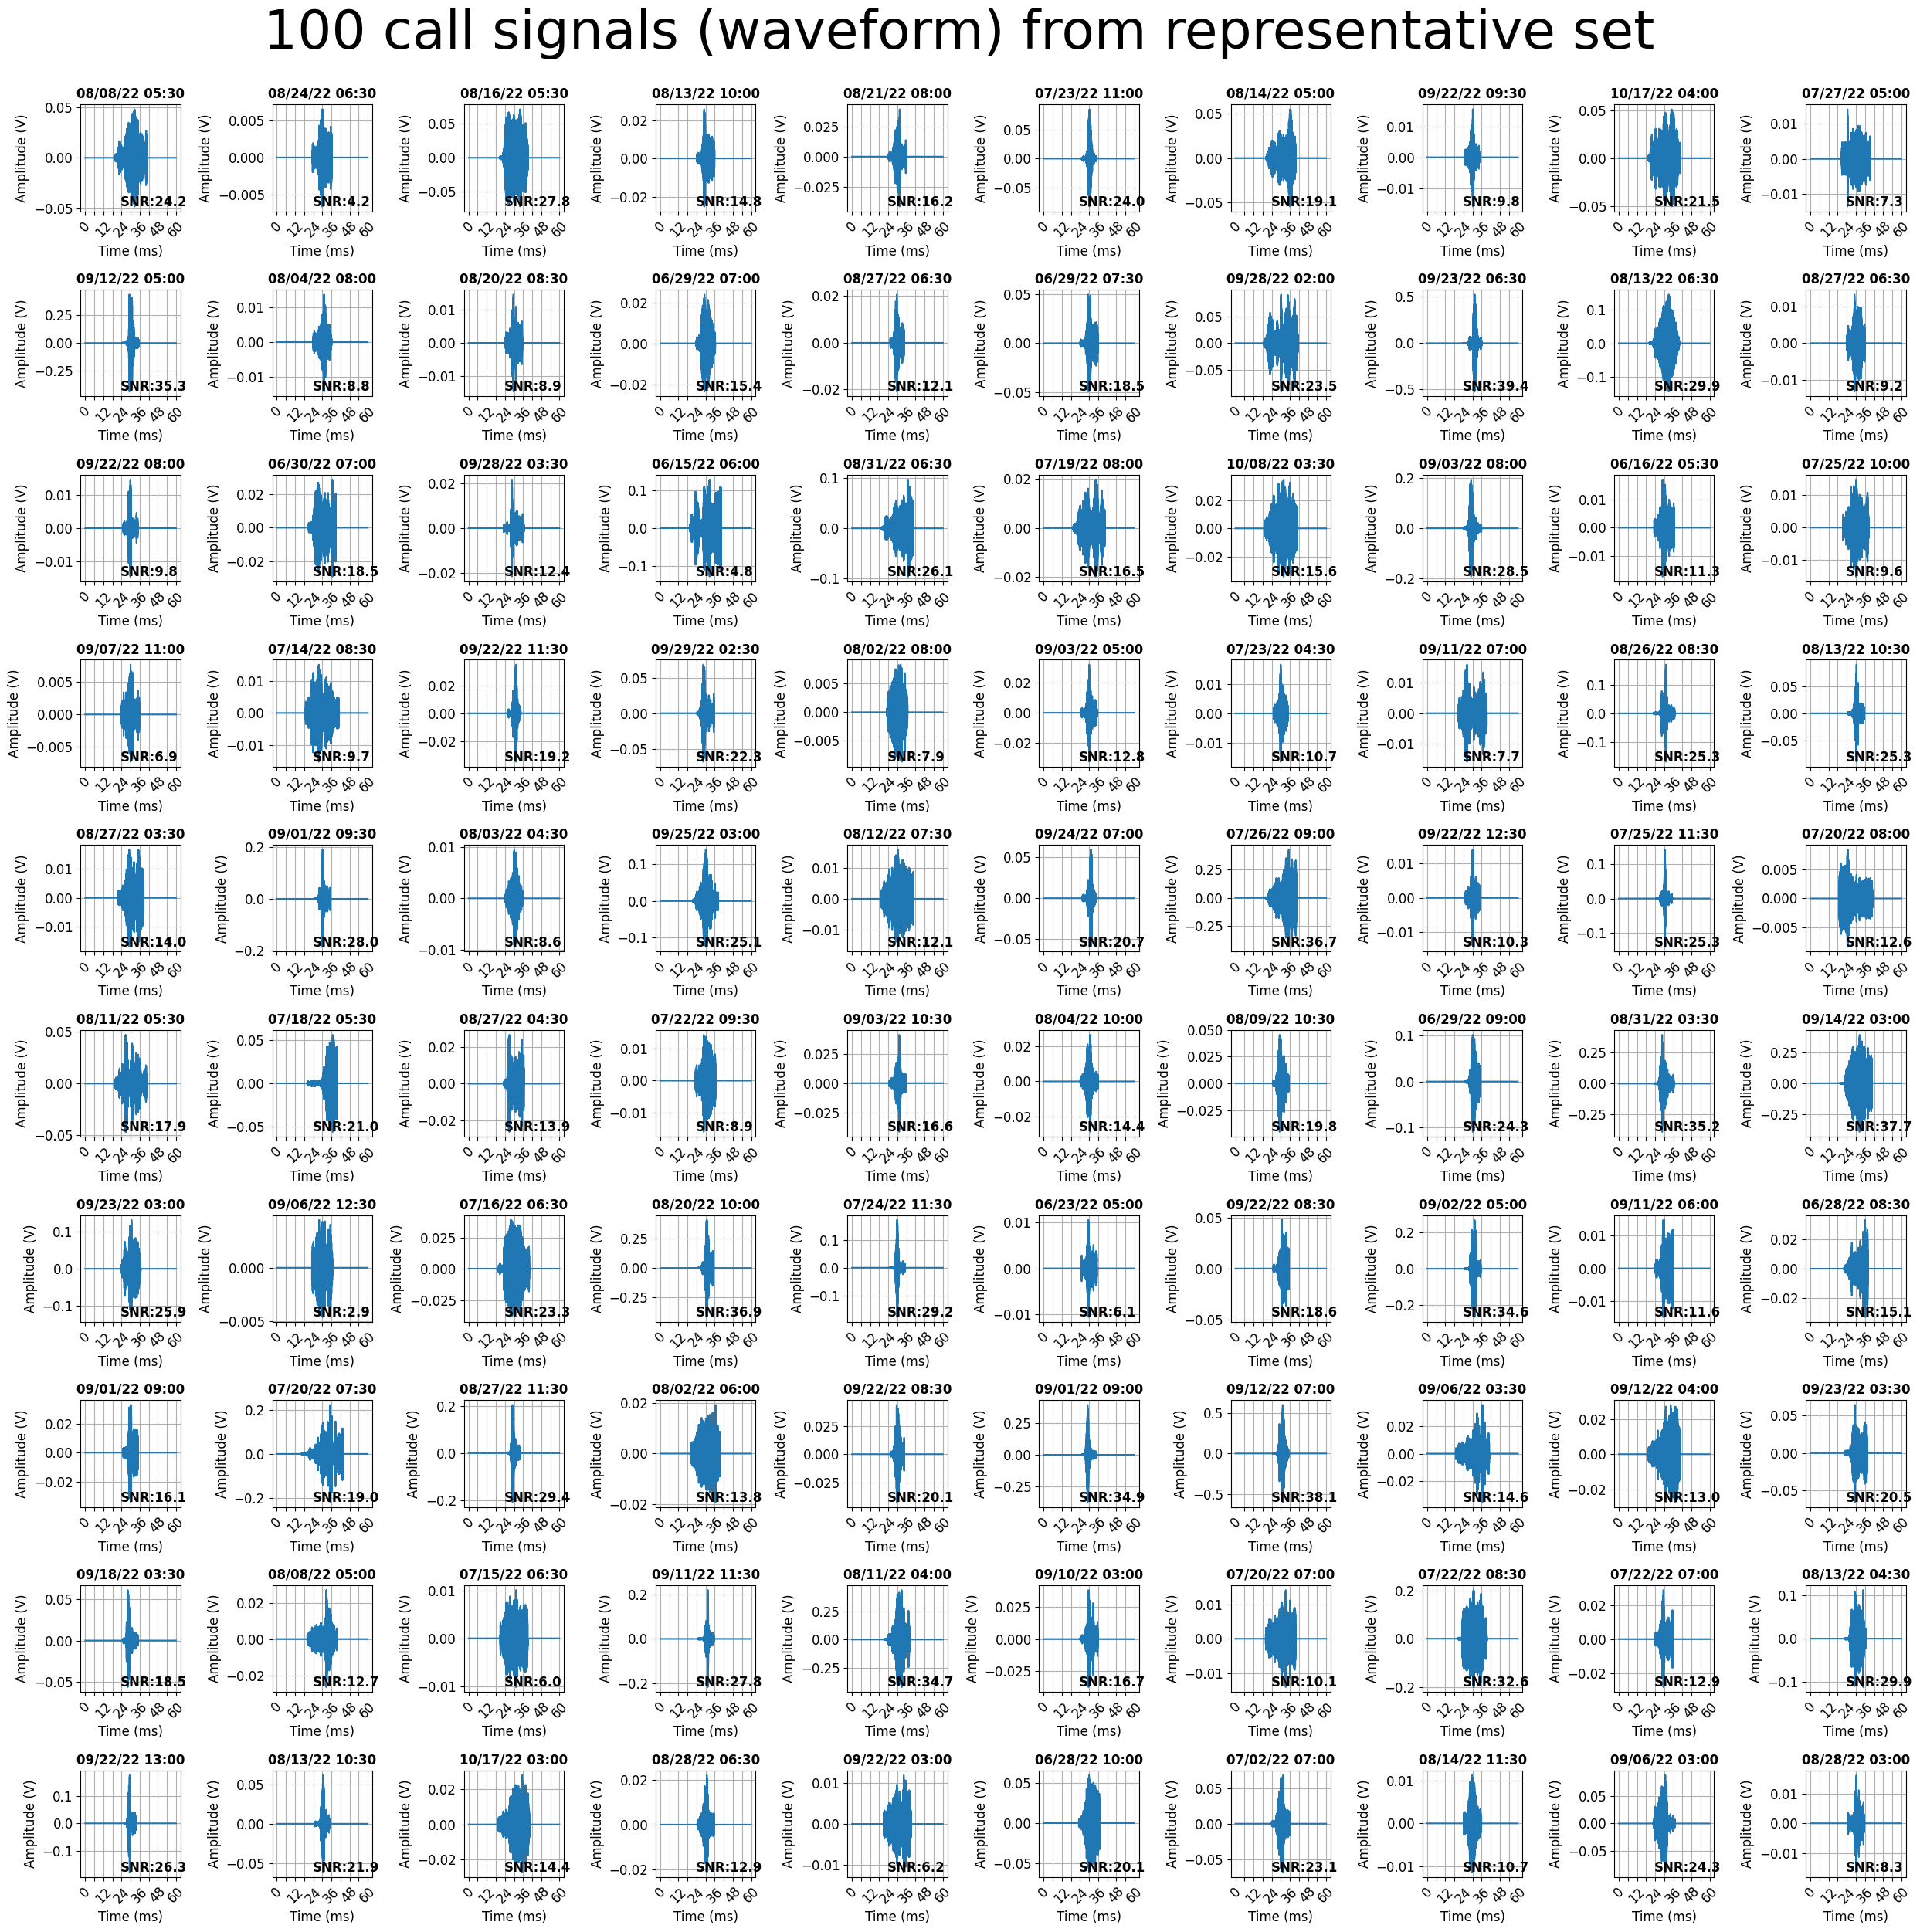

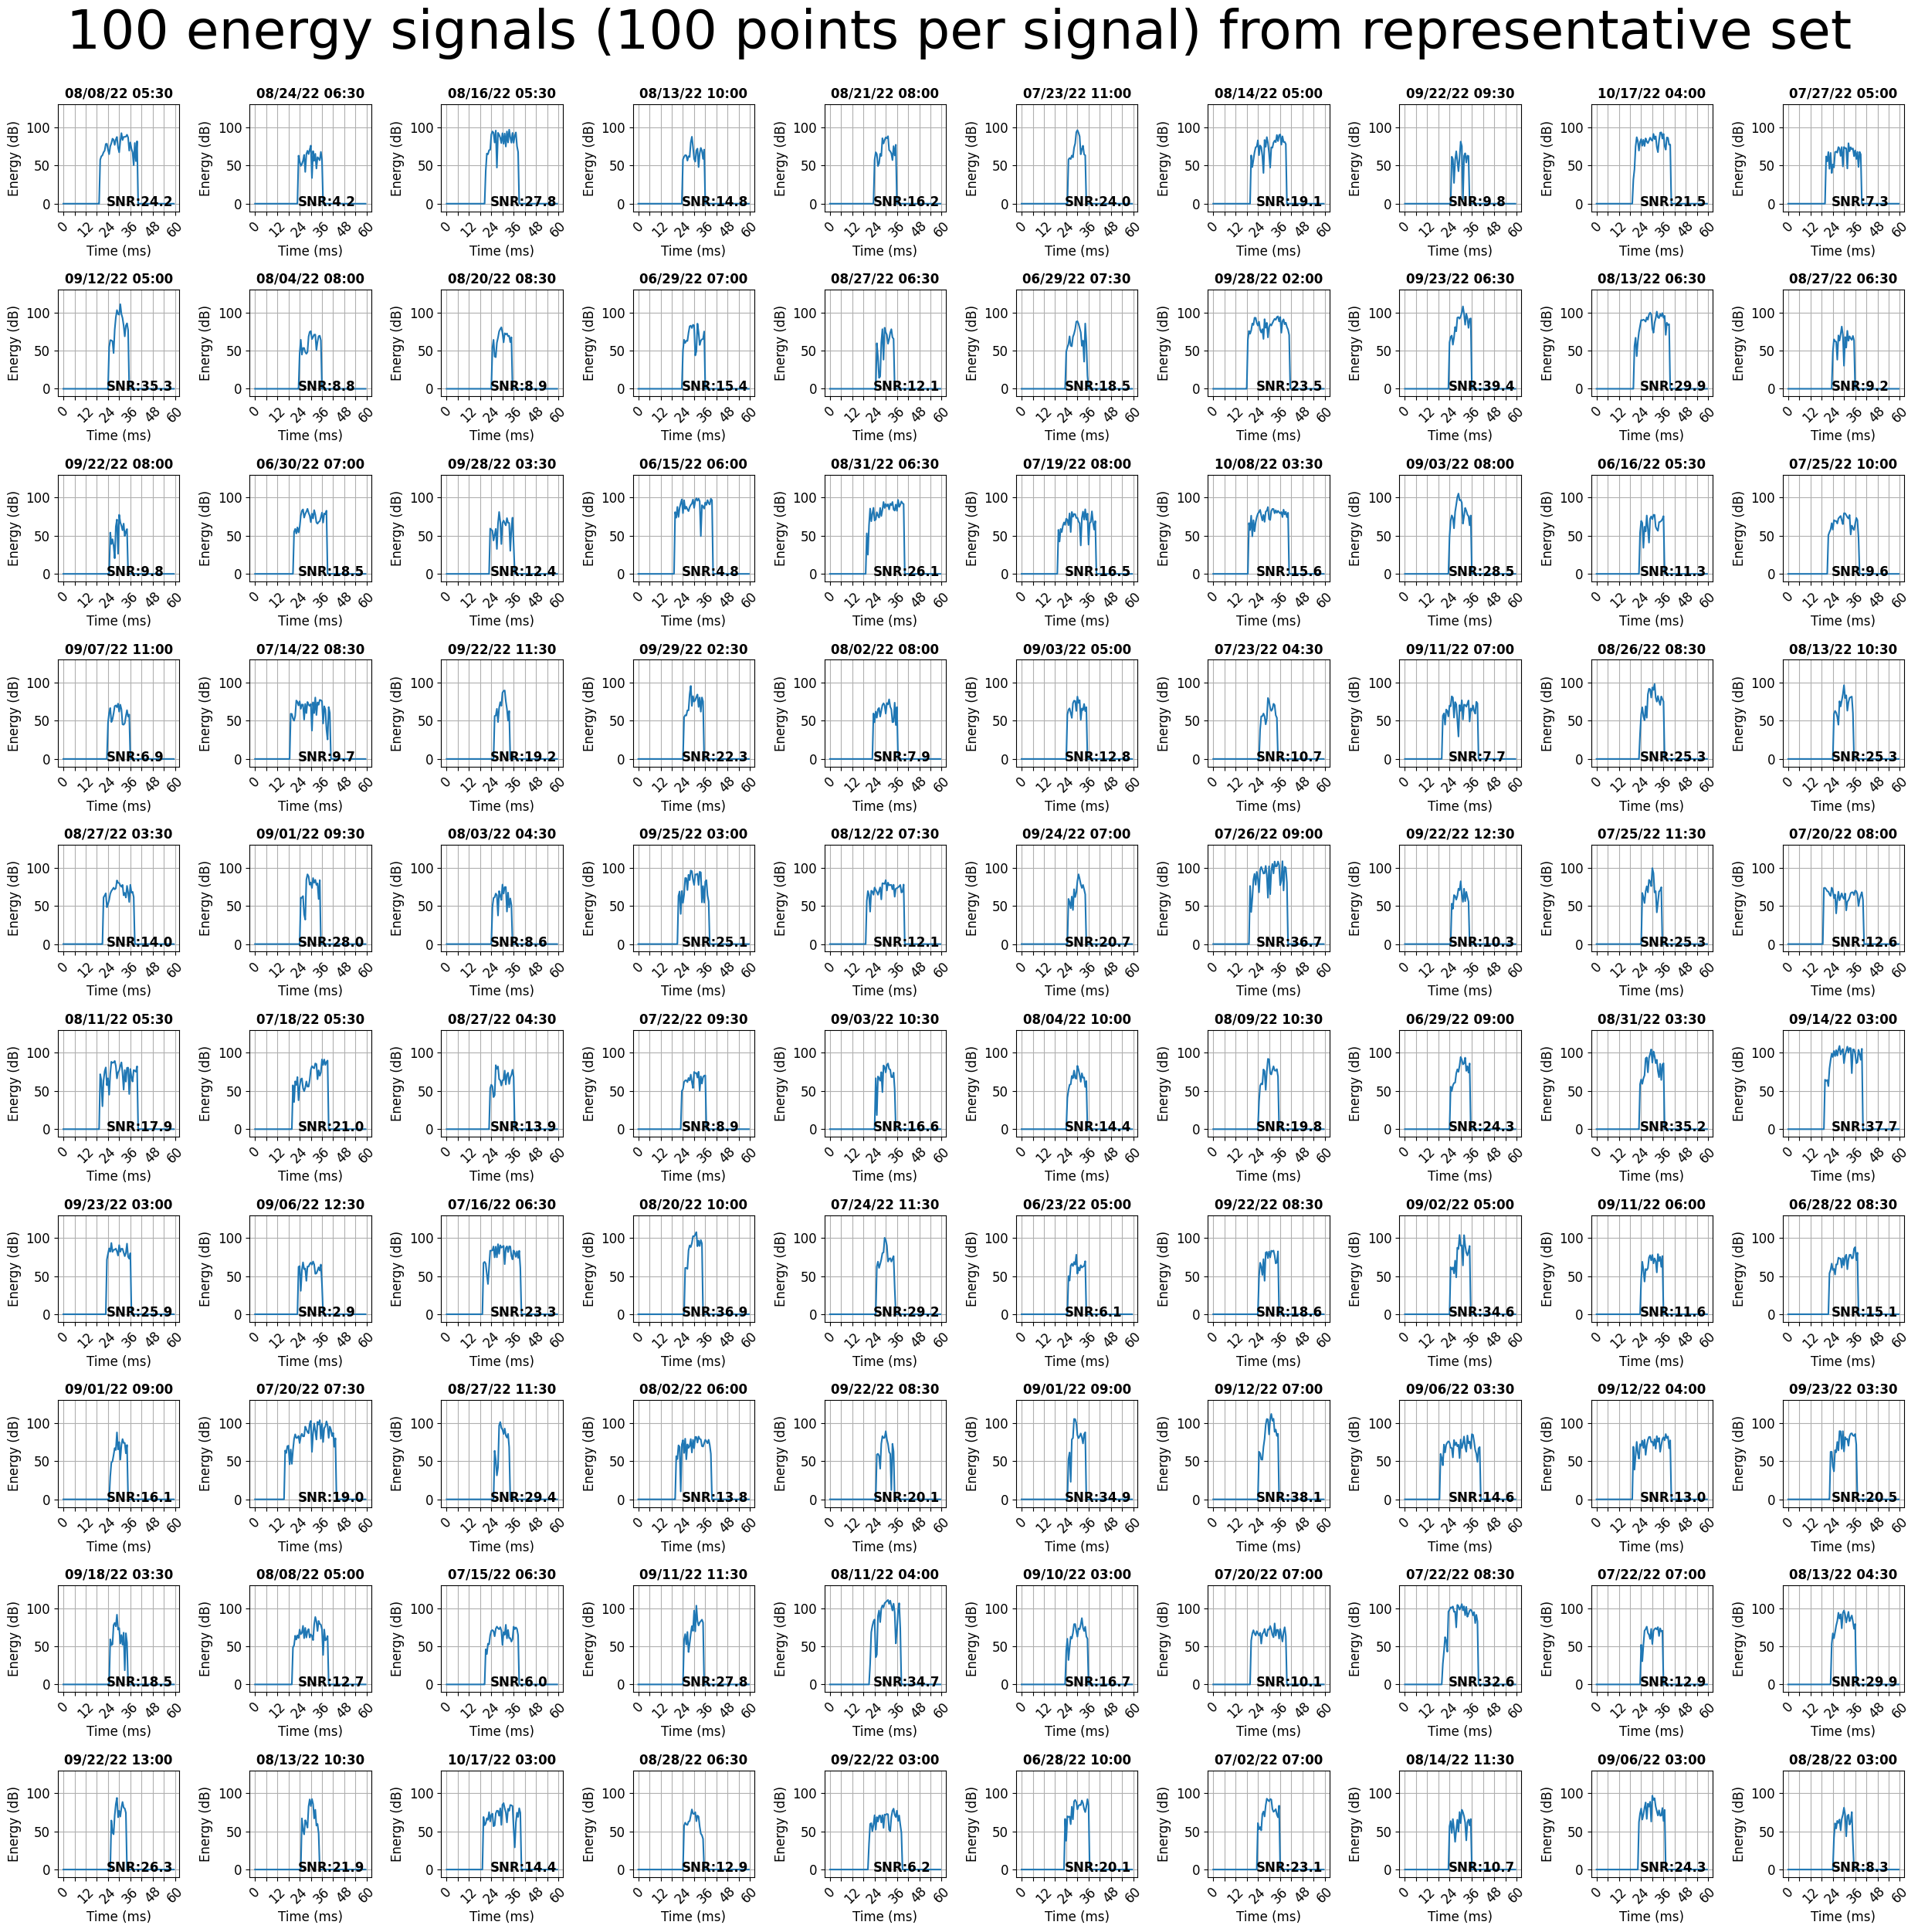

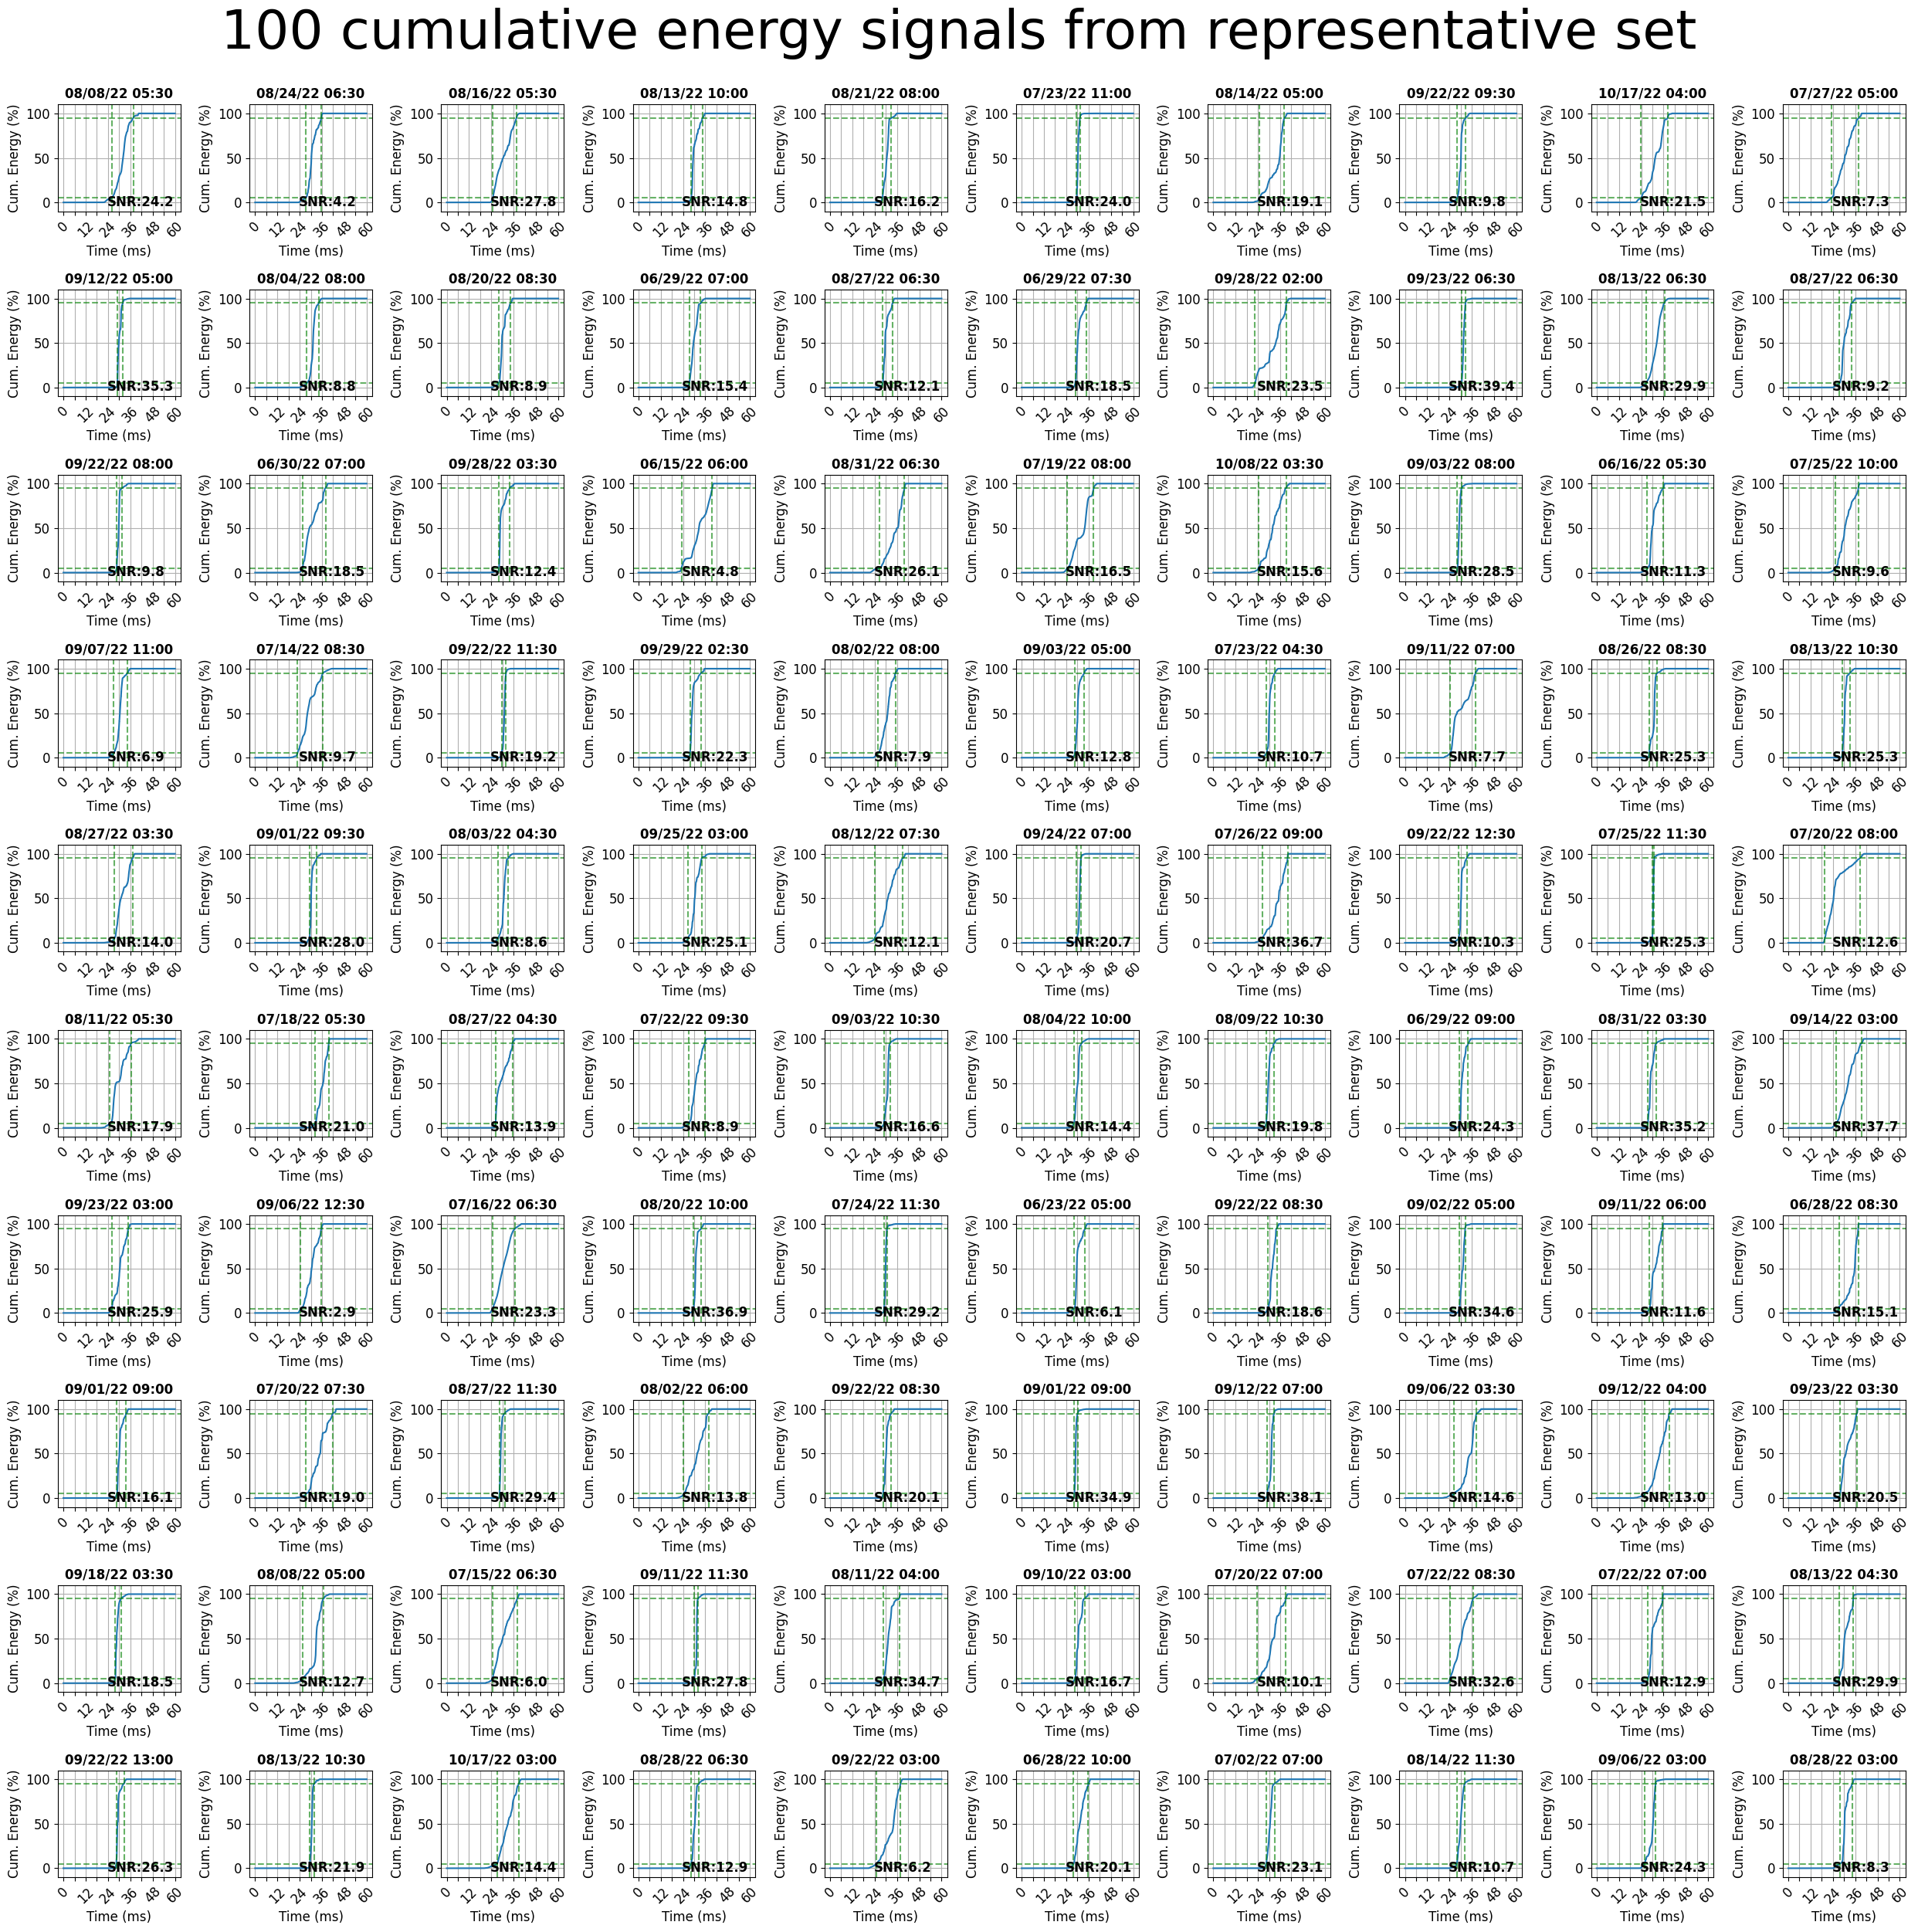

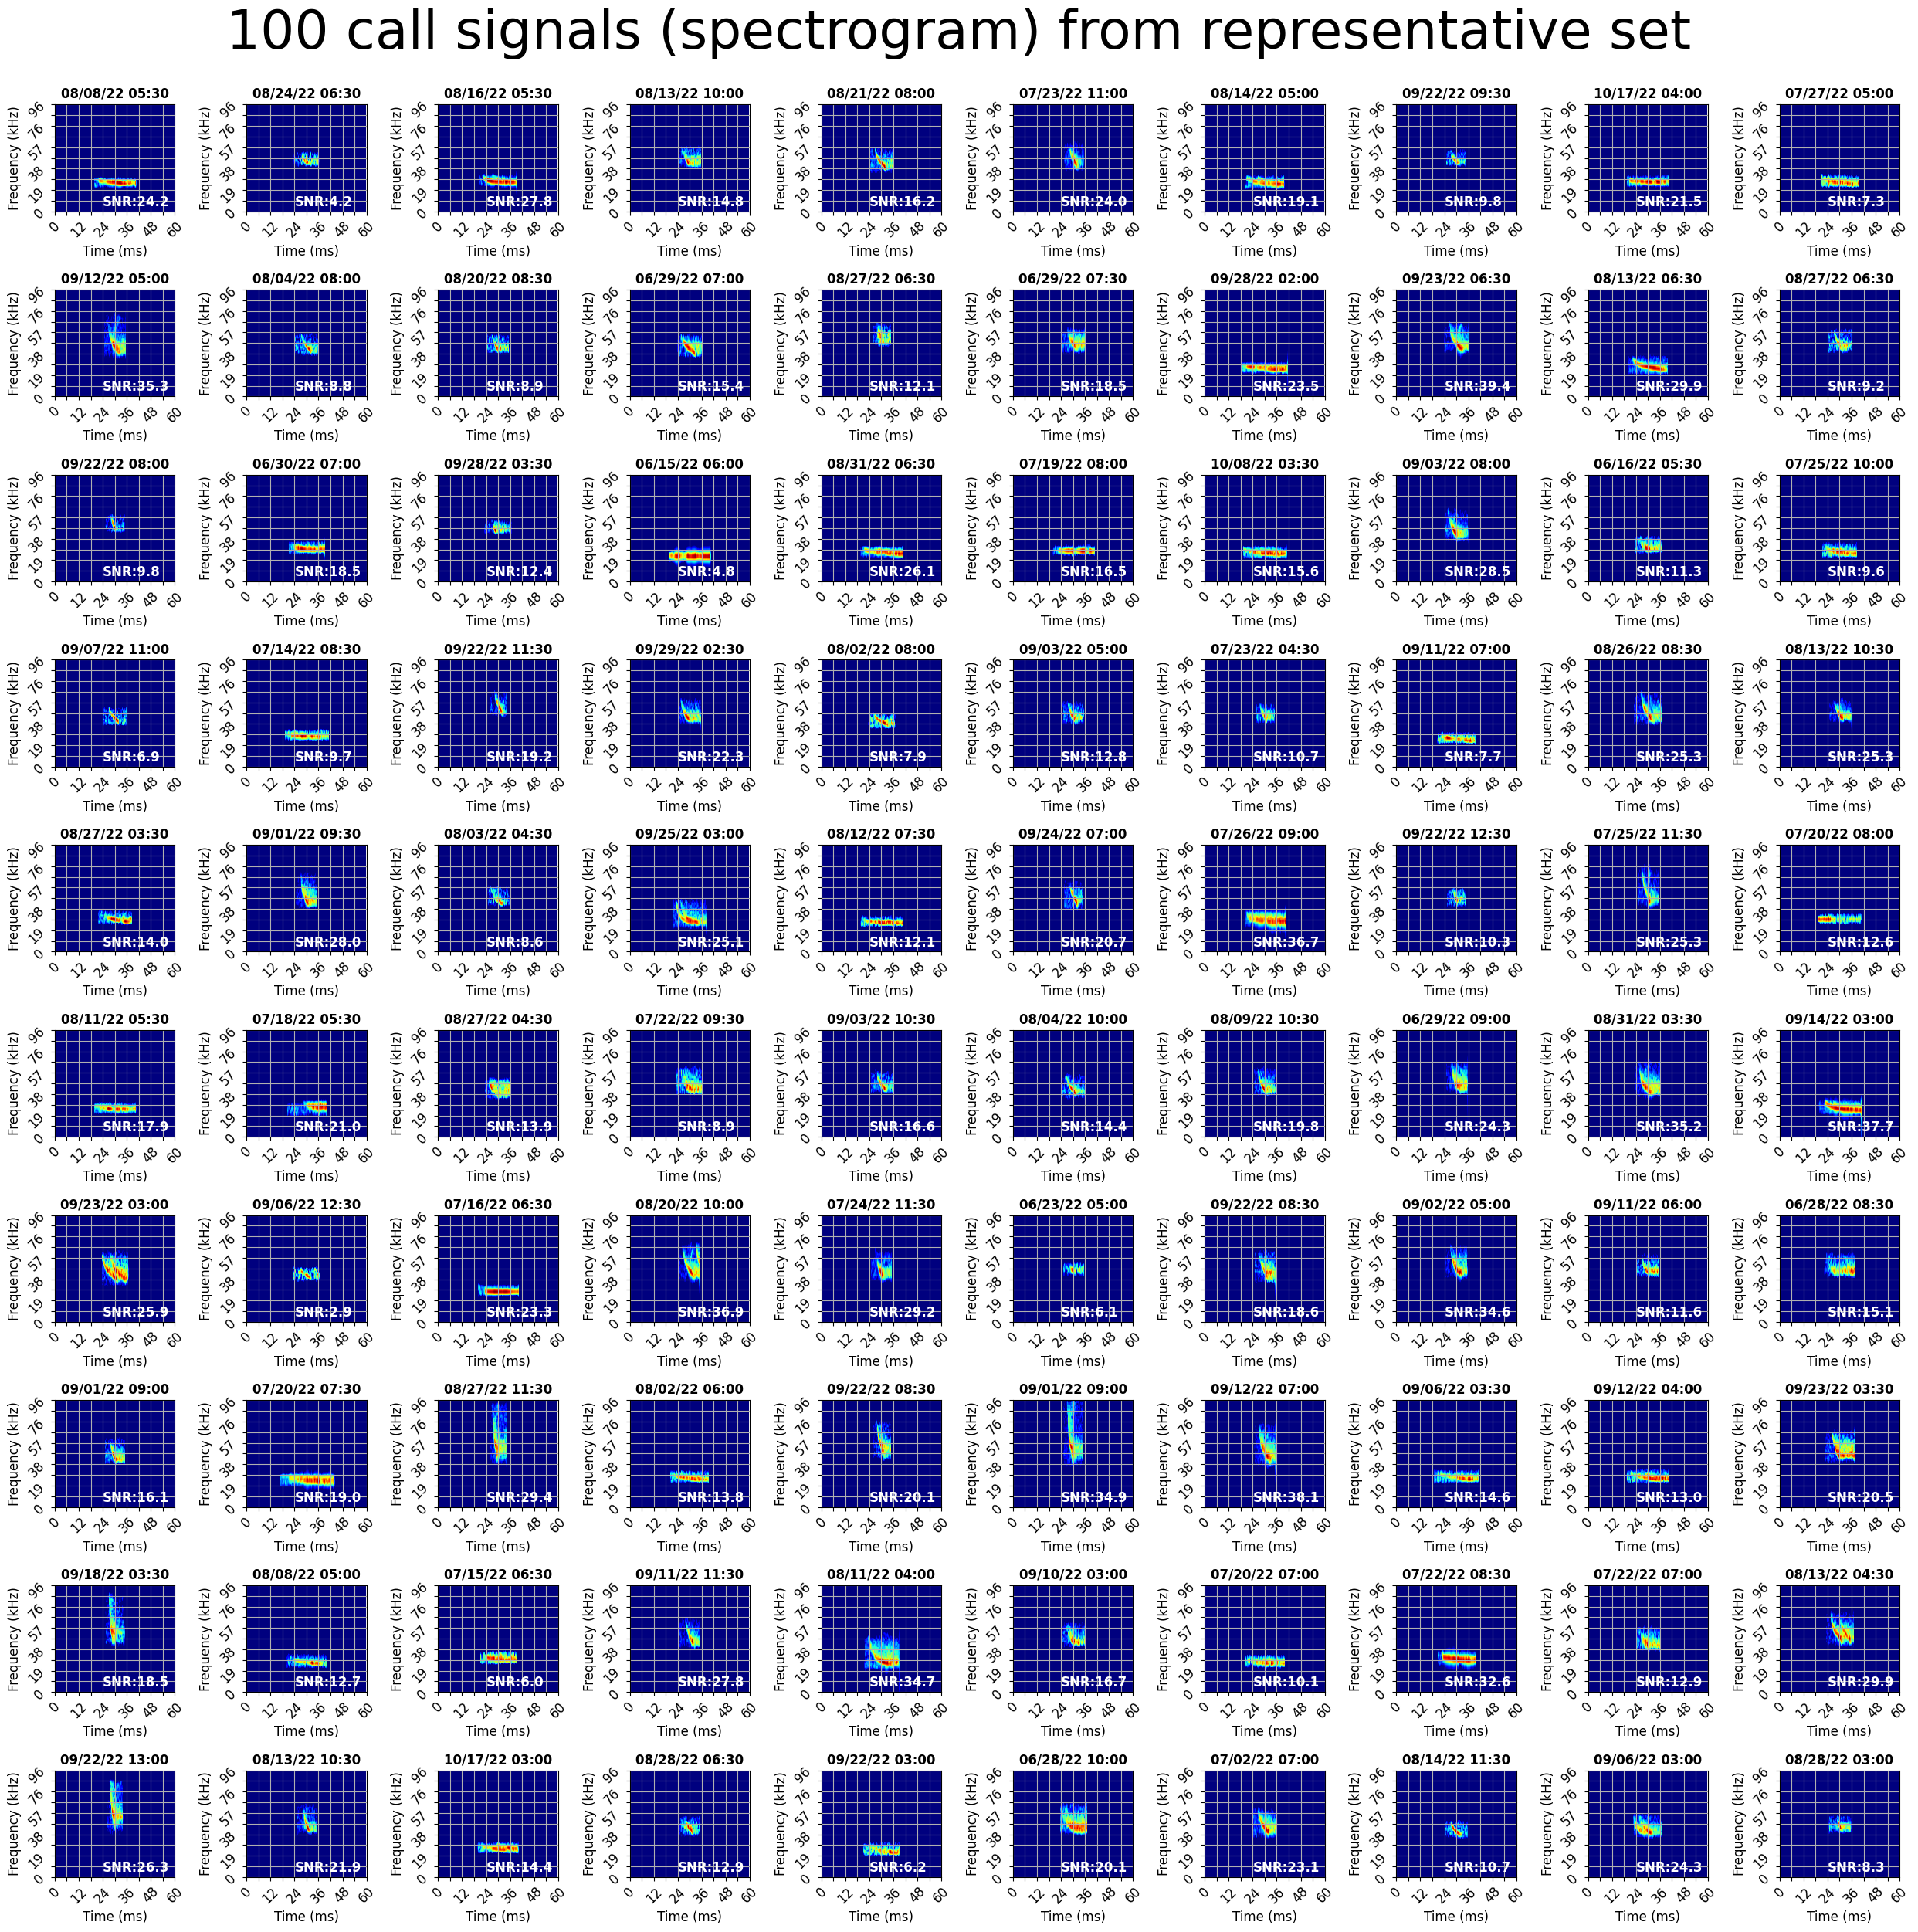

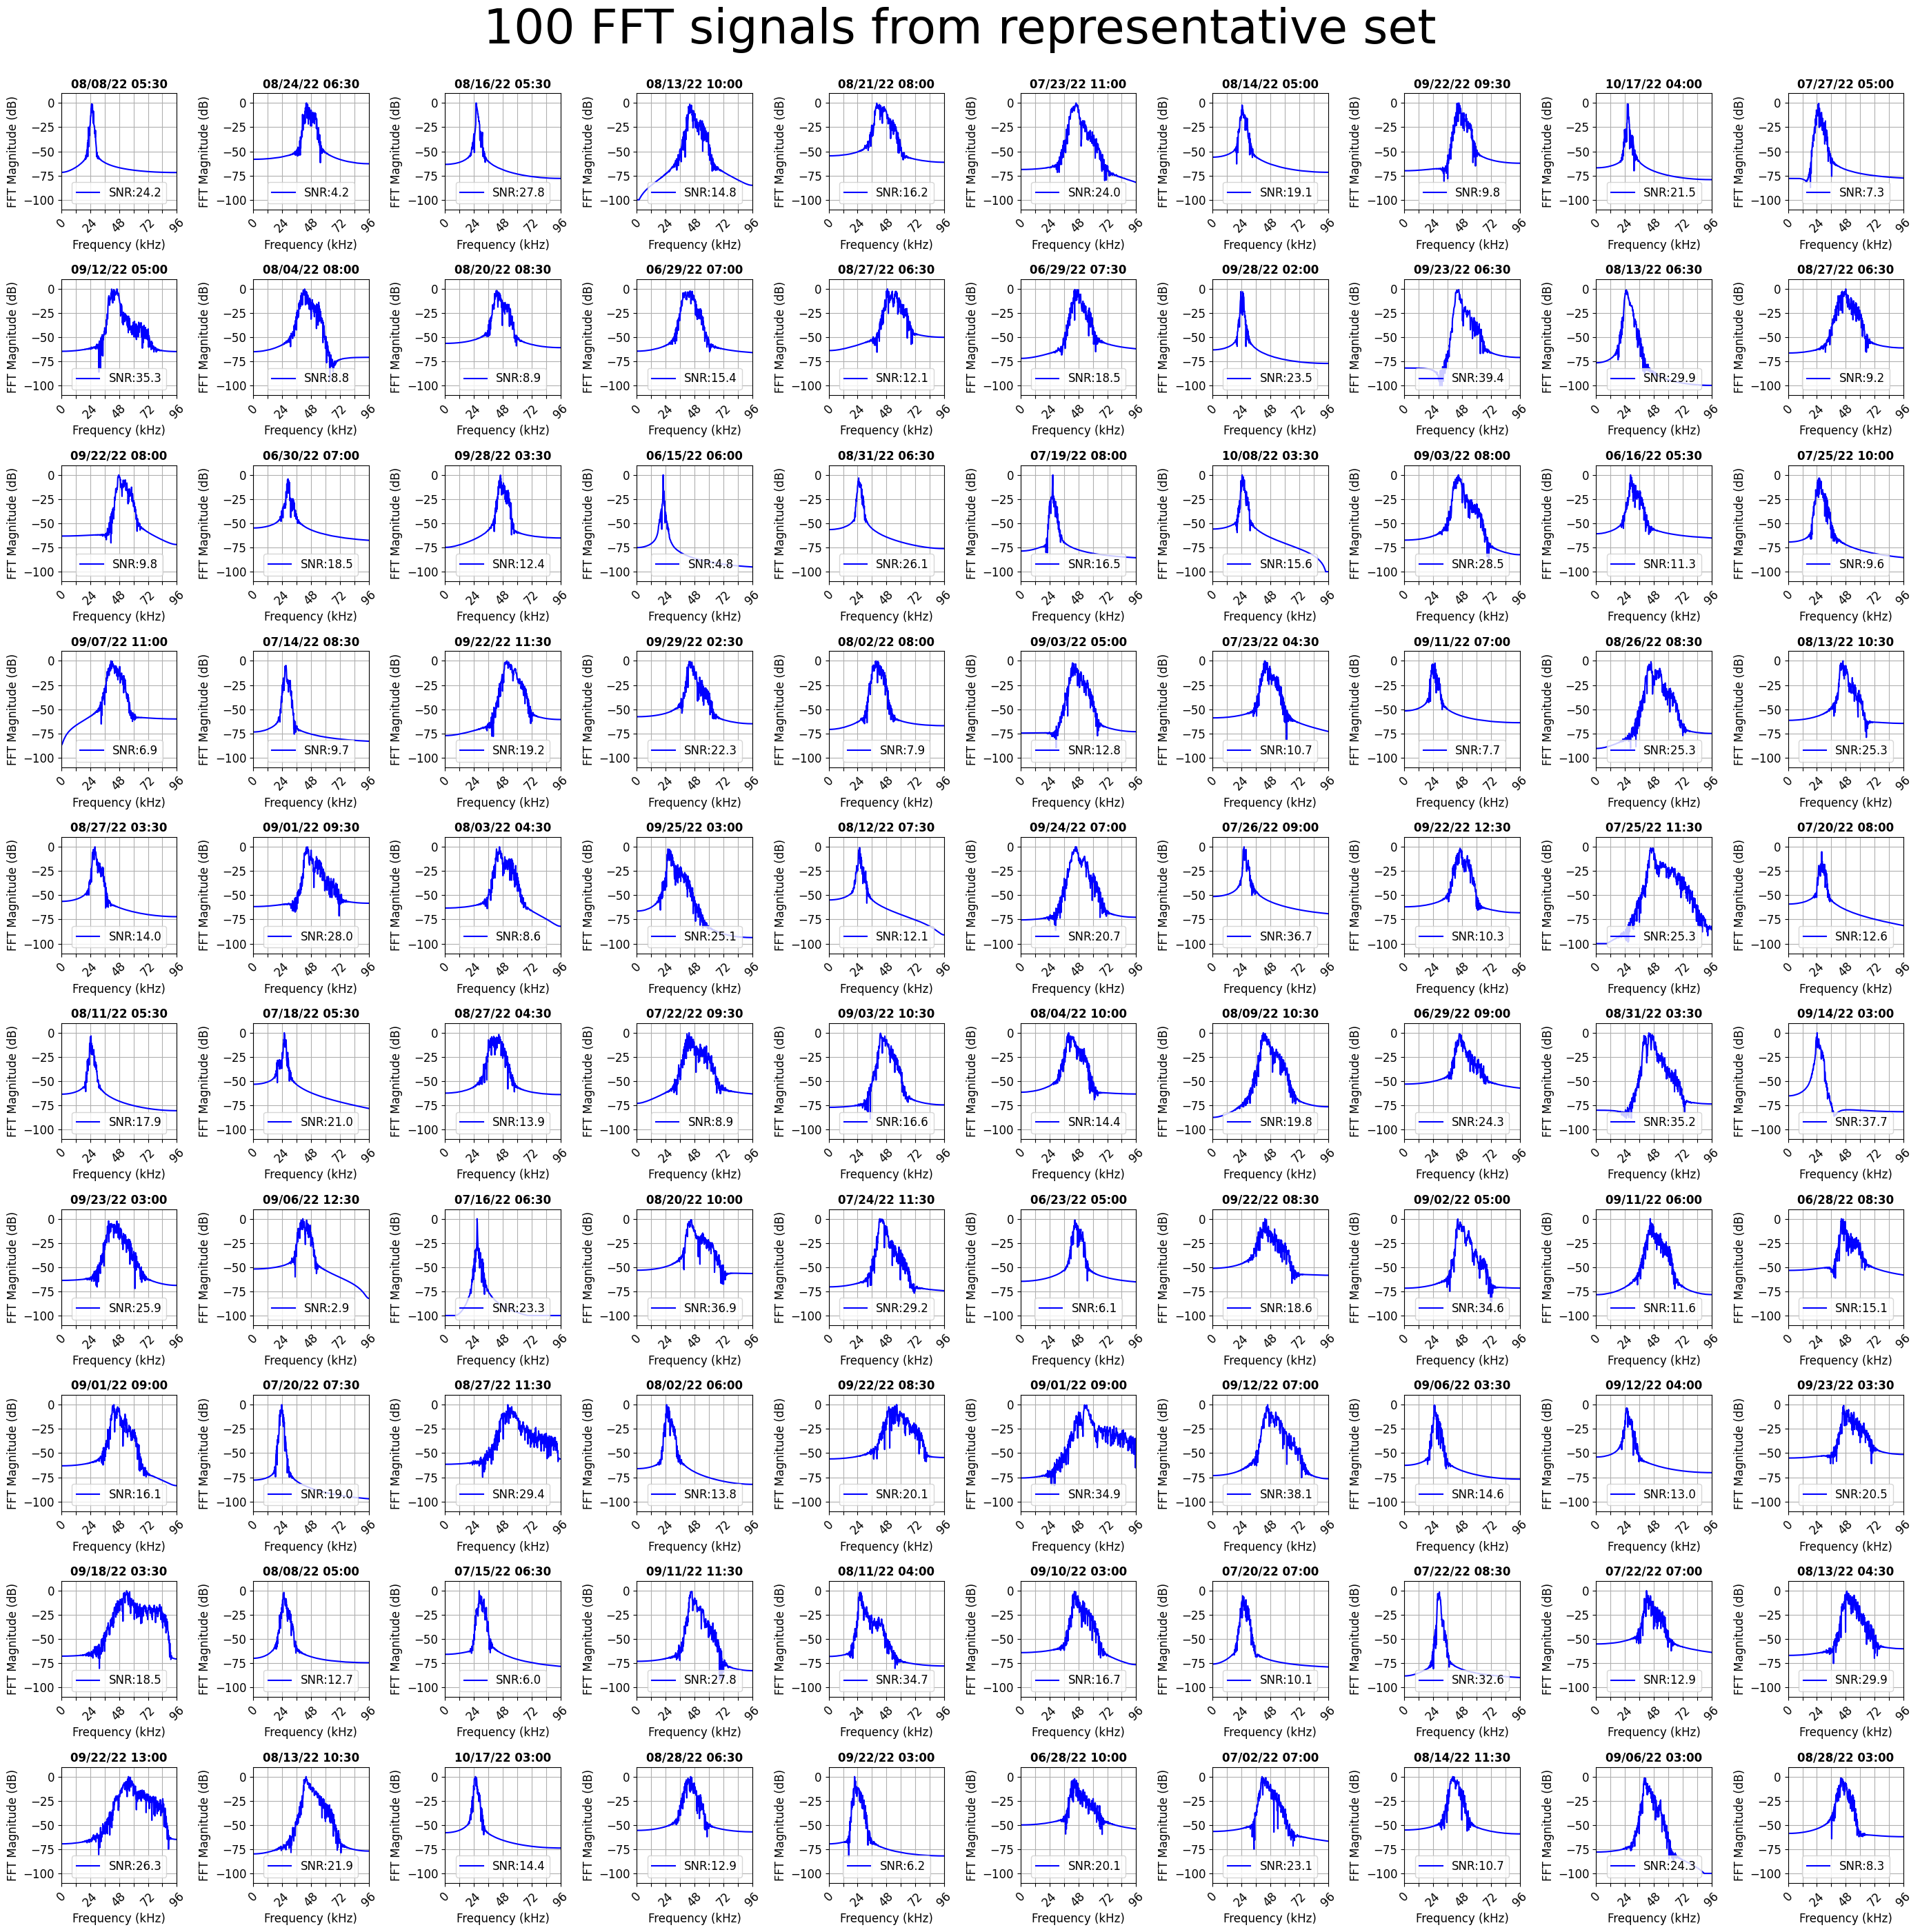

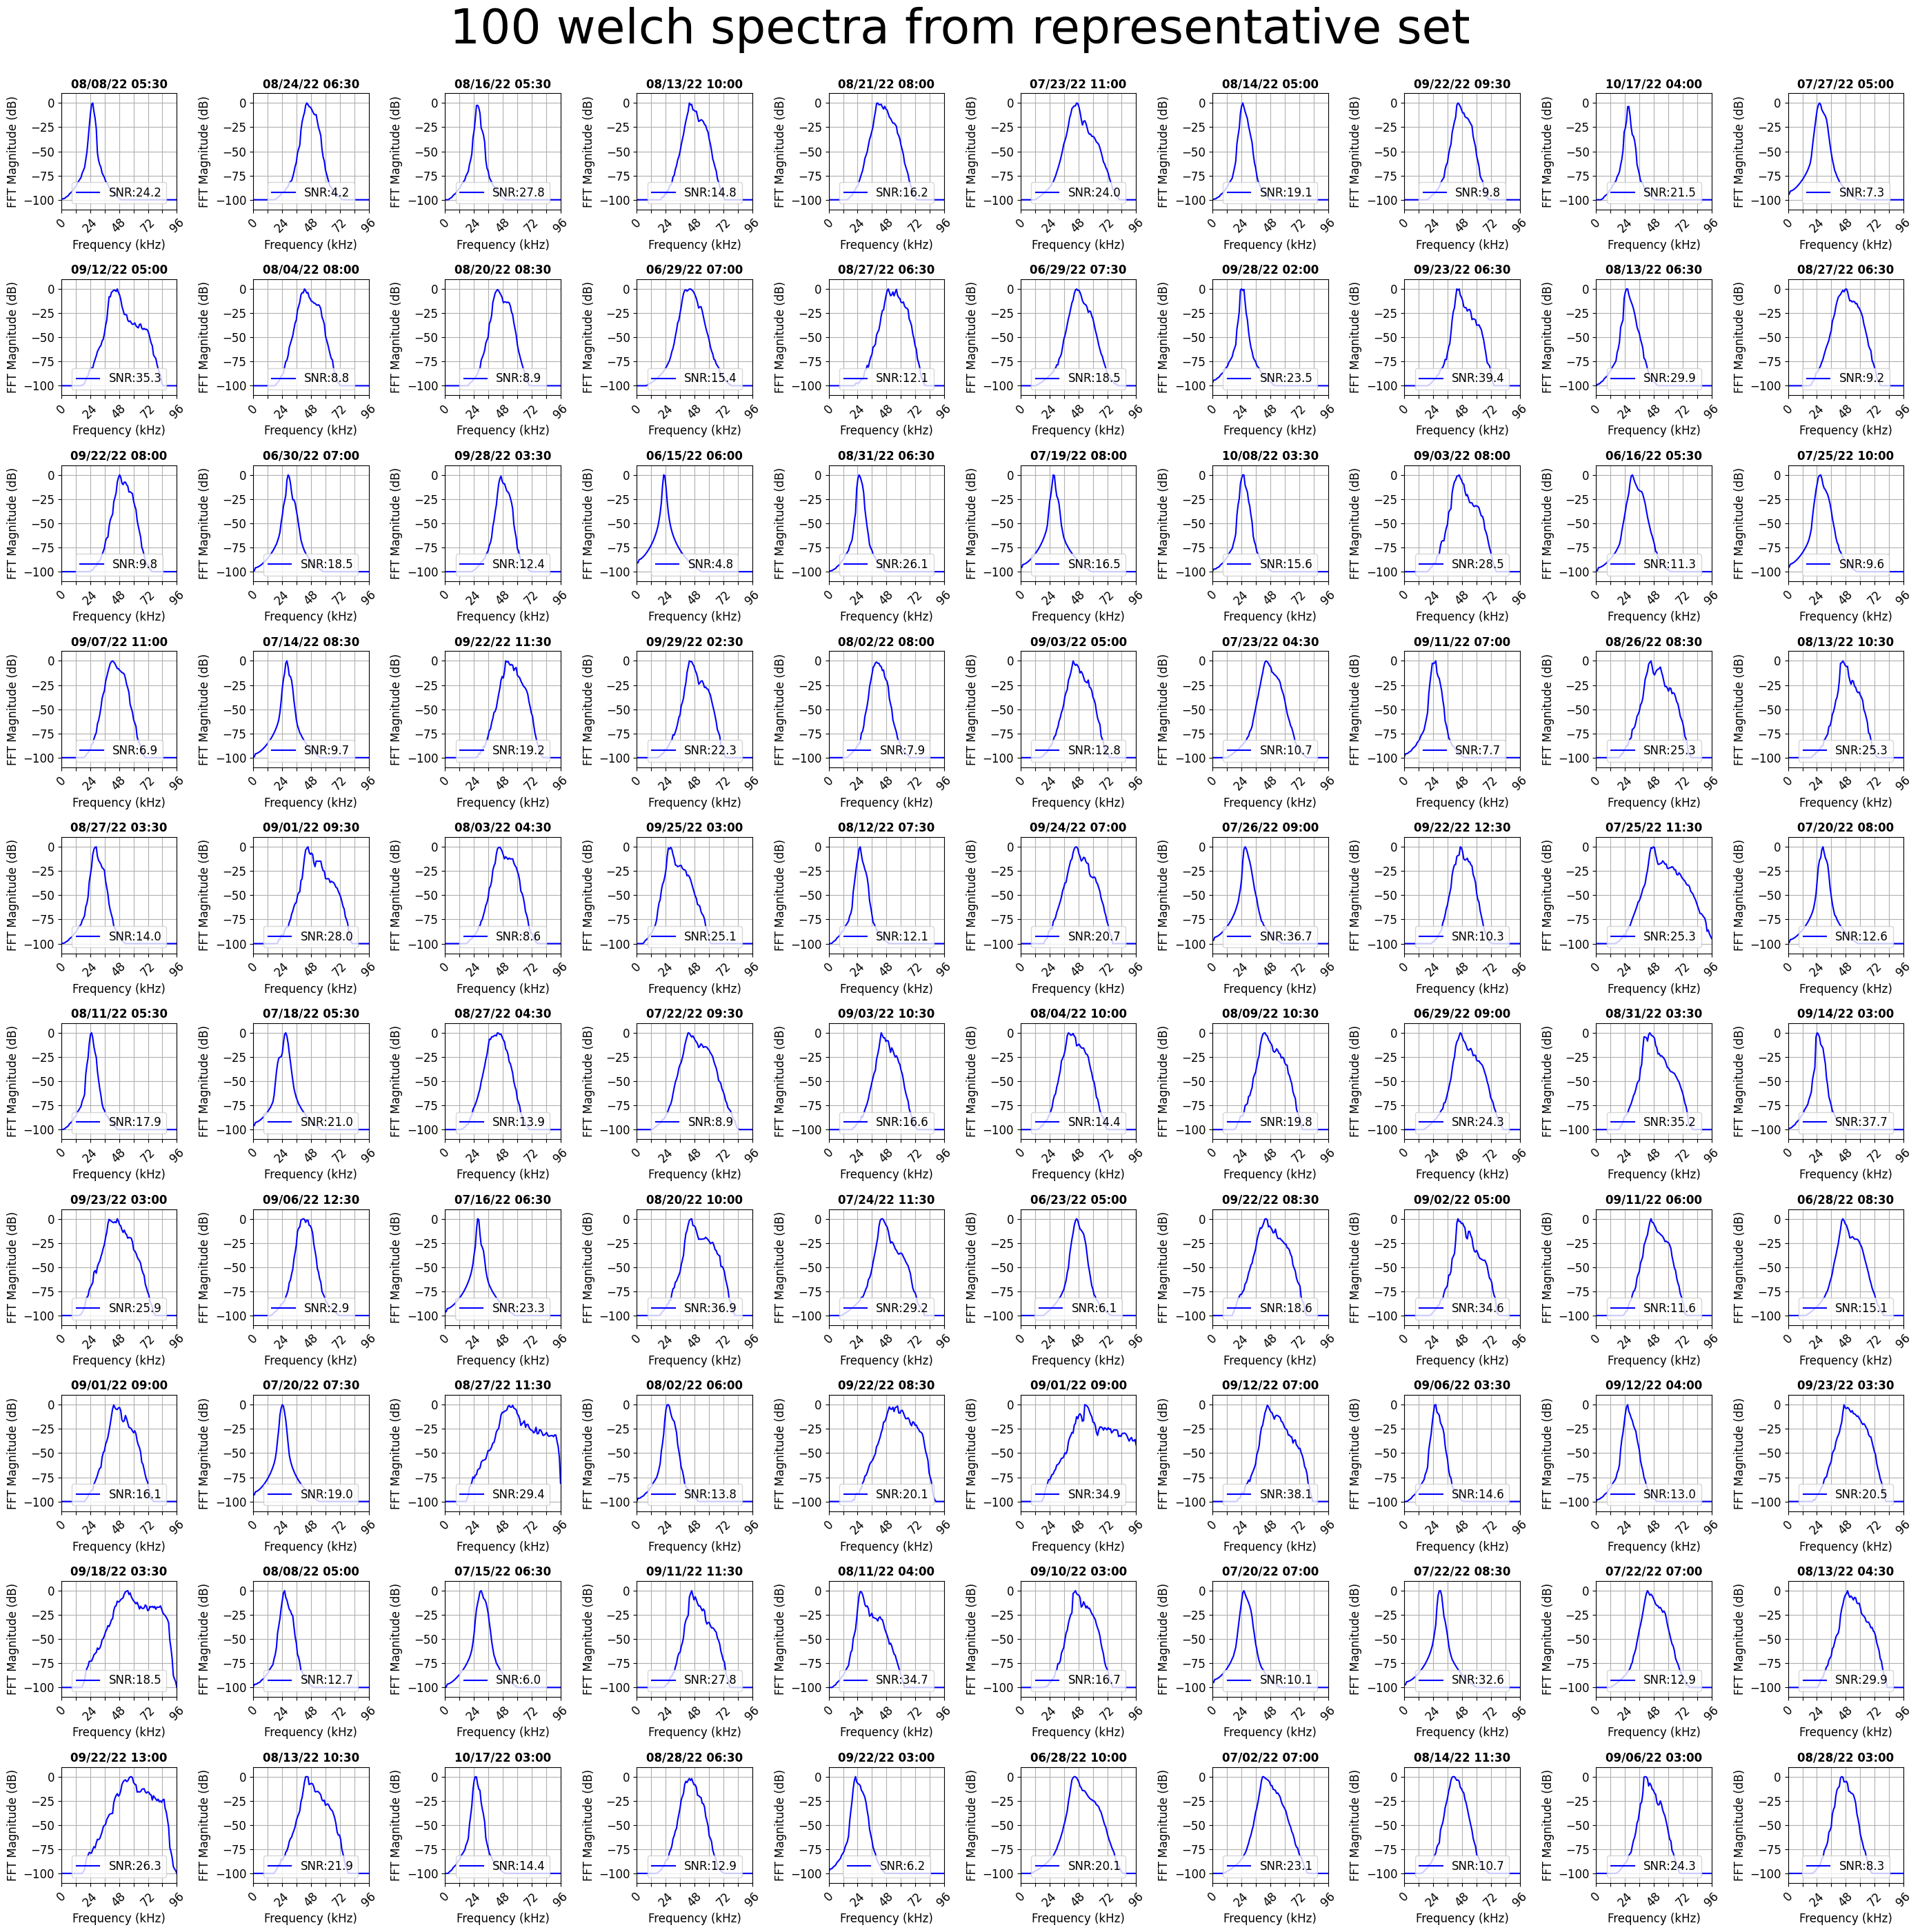

In [8]:
set_name = 'representative set'
plot_call_features.plot_n_calls(call_indices, good_snr_location_calls_sampled, all_sites_call_signals, set_name)
plot_call_features.plot_n_energies(call_indices, good_snr_location_calls_sampled, all_sites_call_signals, set_name)
plot_call_features.plot_n_cumenergies(call_indices, good_snr_location_calls_sampled, all_sites_call_signals, set_name)
plot_call_features.plot_n_specs(call_indices, good_snr_location_calls_sampled, all_sites_call_signals, set_name)
plot_call_features.plot_n_ffts(call_indices, good_snr_location_calls_sampled, all_sites_call_signals, set_name)
plot_call_features.plot_n_welch(call_indices, good_snr_location_calls_sampled, all_sites_call_signals, set_name)